In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection

In [2]:
fraud = pd.read_csv("C:/Users/manth/Assignment/Random forest/Fraud_check.csv")
fraud_check = fraud
fraud_check.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
fraud_check = fraud_check.rename(columns = {'Marital.Status': 'Marital_Status', 'Taxable.Income':'Taxable_Income','City.Population':'City_Population', 'Work.Experience':'Work_Experience'})
fraud_check.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


## Exploratory Data Analysis (EDA)

In [4]:
fraud_check.describe()

,Taxable_Income,City_Population,Work_Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
fraud_check.isnull().sum()

Undergrad          0
Marital_Status     0
Taxable_Income     0
City_Population    0
Work_Experience    0
Urban              0
dtype: int64

In [6]:
fraud_check.shape

(600, 6)

In [7]:
def split(num):
    if num < 30000:
        return 'Risky'
    else:
        return 'Good'
    
fraud_check.Taxable_Income = fraud_check.Taxable_Income.apply(split) 

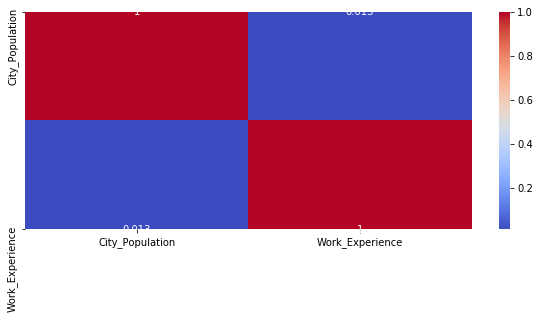

In [8]:
#Correlation heatmap
corr = fraud_check.corr()
plt.figure(figsize=(10,4))
sns.heatmap(corr,xticklabels=True,yticklabels=True,annot = True,cmap ='coolwarm')


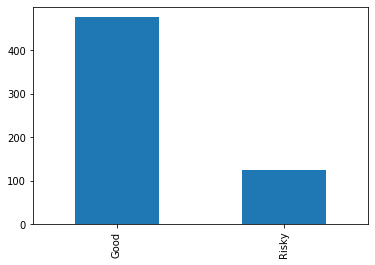

Good     476
Risky    124
Name: Taxable_Income, dtype: int64


In [9]:
fraud_check['Taxable_Income'].value_counts(sort=True).plot.bar()
plt.show()
print(fraud_check['Taxable_Income'].value_counts())

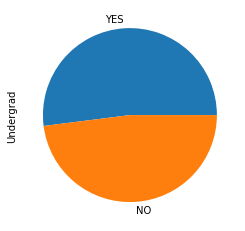

YES    312
NO     288
Name: Undergrad, dtype: int64


In [10]:
fraud_check['Undergrad'].value_counts().plot.pie()
plt.show()
print(fraud_check['Undergrad'].value_counts())

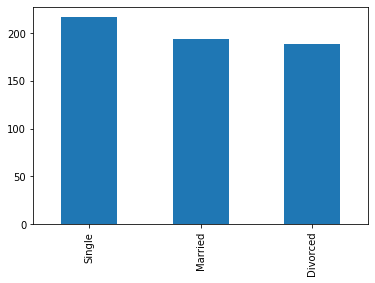

Single      217
Married     194
Divorced    189
Name: Marital_Status, dtype: int64


In [11]:
fraud_check['Marital_Status'].value_counts().plot.bar()
plt.show()
print(fraud_check['Marital_Status'].value_counts())

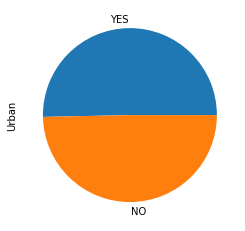

YES    302
NO     298
Name: Urban, dtype: int64


In [12]:
fraud_check['Urban'].value_counts().plot.pie()
plt.show()
print(fraud_check['Urban'].value_counts())

In [13]:
fraud_check.Taxable_Income.value_counts()

Good     476
Risky    124
Name: Taxable_Income, dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder

label= LabelEncoder()
fraud_check1 = fraud_check[['Undergrad', 'Marital_Status','Urban']].apply(label.fit_transform)
fraud_check1 = fraud_check1.rename(columns={'Undergrad':'Undergrad_','Marital_Status':'Marital_Status_','Urban':'Urban_'})
fraud_check1.head()

,Undergrad_,Marital_Status_,Urban_
0,0,2,1
1,1,0,1
2,0,1,1
3,1,2,1
4,0,1,0


In [15]:
colnames=list(fraud_check.columns)
colnames

['Undergrad',
 'Marital_Status',
 'Taxable_Income',
 'City_Population',
 'Work_Experience',
 'Urban']

In [16]:
fraud_check = pd.concat([fraud_check,fraud_check1], axis=1, sort=False)
fraud_check = fraud_check.drop(columns={'Undergrad','Marital_Status','Urban'},axis=1)
fraud_check = fraud_check[["Undergrad_","Marital_Status_","City_Population","Work_Experience","Urban_","Taxable_Income"]]

fraud_check.head()

,Undergrad_,Marital_Status_,City_Population,Work_Experience,Urban_,Taxable_Income
0,0,2,50047,10,1,Good
1,1,0,134075,18,1,Good
2,0,1,160205,30,1,Good
3,1,2,193264,15,1,Good
4,0,1,27533,28,0,Good


In [17]:
colnames=list(fraud_check.columns)
predictors = colnames[:5]
target=colnames[5]
print("predictors: ",predictors)
print("target: ",target)

predictors:  ['Undergrad_', 'Marital_Status_', 'City_Population', 'Work_Experience', 'Urban_']
target:  Taxable_Income


In [18]:
X = fraud_check[predictors]
Y = fraud_check[target]

## Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=15,criterion="entropy")
rf.fit(X,Y) # Fitting RandomForestClassifier model from sklearn.ensemble

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=3,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [20]:
# Attributes that comes along with RandomForest function
rf.estimators_ 
rf.classes_ # class labels (output)
rf.n_classes_ # Number of levels in class labels 
rf.n_features_  # Number of input features in model 5 here.
rf.n_outputs_ # Number of outputs when fit performed
rf.oob_score_

0.7416666666666667

## Actual vs Predicted Values

In [21]:
rf.predict(X)
fraud_check['rf_pred'] = rf.predict(X)
cols = ['rf_pred','Taxable_Income']
fraud_check[cols].head()

,rf_pred,Taxable_Income
0,Good,Good
1,Good,Good
2,Good,Good
3,Good,Good
4,Good,Good


In [22]:
fraud_check["Taxable_Income"]

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable_Income, Length: 600, dtype: object

In [23]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_matrix(fraud_check["Taxable_Income"],fraud_check['rf_pred']) # Confusion matrix

pd.crosstab(fraud_check["Taxable_Income"],fraud_check['rf_pred'])

rf_pred,Good,Risky
Taxable_Income,,
Good,476,0
Risky,8,116


In [24]:
classification_report = classification_report(Y,rf.predict(X))
print(classification_report)

              precision    recall  f1-score   support

        Good       0.98      1.00      0.99       476
       Risky       1.00      0.94      0.97       124

    accuracy                           0.99       600
   macro avg       0.99      0.97      0.98       600
weighted avg       0.99      0.99      0.99       600



In [25]:
print("Accuracy",metrics.accuracy_score(Y,rf.predict(X)))

Accuracy 0.9866666666666667
